In [ ]:
!pip install -q tensorflow==2.0.0b1
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans
!pip install git+https://github.com/nottombrown/imagenet_stubs

In [ ]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt

#Importing cleverhans and its attack method
import cleverhans
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent

# Tensorflow and ResNet50 Imports
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load Imagenet Stubs
import imagenet_stubs
from imagenet_stubs.imagenet_2012_labels import name_to_label, label_to_name

In [ ]:
print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())


Tensorflow Version: 2.0.0-beta1
Cleverhans Version: 4.0.0-dda3ed9309fe3cd6d5b746c5c9c440d8
GPU Available:  False


57344/56060 [==============================] - 0s 2us/step


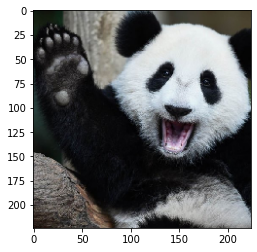

In [ ]:
img_path = tf.keras.utils.get_file('Panda', origin= 'https://pbs.twimg.com/profile_images/829274786362699776/a1ttXfVG.jpg')

img = image.load_img(img_path, target_size=(224, 224))
x_img = image.img_to_array(img)
x_img = np.expand_dims(x_img, axis=0)

plt.imshow(img);

In [ ]:
# Importing ResNet50 Model
resnet = ResNet50(weights='imagenet')


# x = Flatten(input_shape=resnet.output.shape)(resnet.output)
# x = Dense(1024, activation='sigmoid')(x)
# predictions = Dense(1000, activation='softmax', name='pred')(x)
# model = tf.keras.Model(inputs=[resnet.input], outputs=[predictions])

102858752/102853048 [==============================] - 3s 0us/step


In [ ]:
pred = resnet.predict(x_img)
label = np.argmax(pred, axis=1)[0]
confidence = pred[:,label][0]
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))

Prediction: giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca - confidence 1.00


In [ ]:
# Generating Adversarial Attack Sample
fgsm_samples = fast_gradient_method(resnet, x_img, 5, np.inf, targeted=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


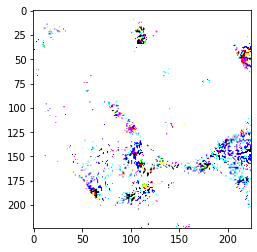

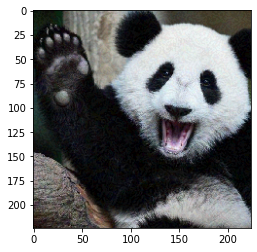

In [ ]:
plt.figure(1)
plt.imshow(fgsm_samples.numpy()[0])
plt.figure(2)
plt.imshow(fgsm_samples.numpy()[0]/255)

In [ ]:
pred = resnet.predict(fgsm_samples)
label = np.argmax(pred, axis=1)[0]
confidence = pred[:,label][0]
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))

Prediction: gibbon, Hylobates lar - confidence 0.36


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


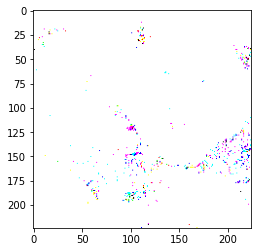

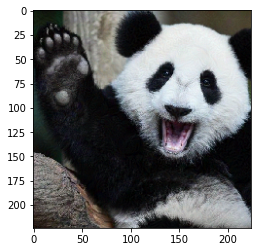

In [ ]:
pgd_samples = projected_gradient_descent(resnet, x_img, eps_iter=1,eps=5, nb_iter=10, norm= np.inf, targeted=False)
plt.figure(1)
plt.imshow(pgd_samples.numpy()[0])
plt.figure(2)
plt.imshow(pgd_samples.numpy()[0]/255)

In [ ]:
pred = resnet.predict(pgd_samples)
label = np.argmax(pred, axis=1)[0]
confidence = pred[:,label][0]
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))

Prediction: indri, indris, Indri indri, Indri brevicaudatus - confidence 1.00


In [ ]:
epsilon = 0.1
# The target value may have to be changed to work, some images are more easily missclassified as different labels
target = 100

target_label = np.reshape(target, (1,)).astype('int64') # Give target label proper size and dtype to feed through

adv_example_targeted_label = fast_gradient_method(resnet, x_img, 5, np.inf, y=target_label, targeted=True)

adv_example_targeted_label_pred = resnet.predict(adv_example_targeted_label)

label = np.argmax(adv_example_targeted_label_pred, axis=1)[0]
confidence = adv_example_targeted_label_pred[:,label][0]
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))

Prediction: gibbon, Hylobates lar - confidence 0.37
